# Recolección y manejo de los datos

1) Transfiera  el  dataset  a  un  frame  panda  utilizando  el  método `pd.read.csv(‘dirección_dataset_cargado.csv’)`

In [453]:
!git clone https://github.com/ChenaoB/Database

fatal: destination path 'Database' already exists and is not an empty directory.


In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [455]:
"""
Se transfiere la data a pandas
"""
df = pd.read_csv("/content/Database/DataLeastSquareClasificationtTwoClass.csv")

2) Divida el dataset de la siguiente forma: 75% para entrenamiento el restante para validación

In [456]:
"""
Se divide el dataset en 75 para entrenamiento y el restante para test
"""
train_set = df.sample(frac = 0.75, random_state=39)
test_set = df.drop(train_set.index)

"""
Tengo 2 entradas: X1 X2 (Por tanto es un problema biclase)
Tengo 2 tags: 1, -1 (Esto sería 1 salida)
"""
print(train_set[:5])
print(test_set[:5])

          X1        X2  Y
22  2.658757  2.761905 -1
53 -0.977697  0.554048  1
84  0.215368  2.120182  1
57  0.604397  1.800420  1
87 -0.434967  1.226852  1
          X1        X2  Y
4   2.806944  2.885193 -1
9   0.476725 -0.366186 -1
12  2.830055  2.794111 -1
13  0.289153 -0.591639 -1
14  2.155935  1.772786 -1


# Modelo del perceptron

Entradas
 - X (x_train / x_test)
 - y (y_train / y_test)
 - w nombrado "weight" (Pesos iniciales)
 - α nombrado "alpha" (Learning rate)

In [457]:
# Construcción de matrices

"""
Matriz de etiquetas
"""
y_train = np.zeros((train_set.shape[0], 1))
y_test = np.zeros((test_set.shape[0], 1))

y_train = train_set["Y"].values
y_test = test_set["Y"].values

"""
Matriz de datos
"""
x_train = np.zeros((train_set.shape[0], 2 + 1))
x_test = np.zeros((test_set.shape[0], 2 + 1))

x_train[:, 0:2] = train_set[["X1", "X2"]].values
x_train[:, 2] = np.ones(train_set.shape[0])

x_test[:, 0:2] = test_set[["X1", "X2"]].values
x_test[:, 2] = np.ones(test_set.shape[0])

# Se muestran los primeros 5 datos para verificación

print(f"Matriz de datos de entrenamiento: \n{[[*data] for data in x_train[:5]]}")
print(f"Matriz de etiquetas de entrenamiento: \n{y_train[:5]}", end="\n\n")

print(f"Matriz de datos de test: \n{[[*data] for data in x_test[:5]]}")
print(f"Matriz de etiquetas de test: \n{y_test[:5]}")

Matriz de datos de entrenamiento: 
[[2.658756772, 2.7619046, 1.0], [-0.9776971917, 0.5540483061, 1.0], [0.2153675239, 2.12018241, 1.0], [0.6043968612, 1.800419831, 1.0], [-0.4349665423, 1.226852365, 1.0]]
Matriz de etiquetas de entrenamiento: 
[-1  1  1  1  1]

Matriz de datos de test: 
[[2.806944365, 2.885193104, 1.0], [0.4767252453, -0.3661856701, 1.0], [2.830055031, 2.794110605, 1.0], [0.2891528229, -0.5916386772, 1.0], [2.155935155, 1.772785562, 1.0]]
Matriz de etiquetas de test: 
[-1 -1 -1 -1 -1]


3) Inicialice el vector de parámetros W utilizando algún método de muestreo estadístico, recuerde que para un problema biclase W este tiene tres valores.

In [458]:
# Usando una distribución uniforme

weight = np.random.rand(3)
print(f"Pesos iniciales (w): {weight}")

Pesos iniciales (w): [0.29281592 0.22602342 0.36096474]


4) Establezca un valor de α (Learning rate) = 0.3

In [459]:
alpha = 0.3

In [460]:
iteration = 1000

In [461]:
use_umbral = False

5) Implemente el algoritmo de perceptron para actualizar los valores del vector de parámetros 𝑊 (puede utilizar cualquiera de las alternativas estudiadas en clase)

In [462]:
if use_umbral:
  for iter in range(iteration):
    for item in range(train_set.shape[0]):

      tag = np.sign(np.dot(weight, np.transpose(x_train[item, :])))

      if (y_train[item] == 1 and tag != y_train[item]):
        weight += alpha * np.transpose(x_train[item, :])
      elif (y_train[item] == -1 and tag != y_train[item]):
        weight -= alpha * np.transpose(x_train[item, :])
      else:
        weight = weight

In [463]:
if not use_umbral:
  for iter in range(iteration):
    for item in range(train_set.shape[0]):

      y_predict = np.sign(np.dot(weight, np.transpose(x_train[item, :])))

      x_transposed = np.transpose(x_train[item, :])

      weight = weight - 2 * alpha * x_transposed * (y_predict - y_train[item])

# Analisis del algoritmo

Se grafica:

*   $X1_{train}$ vs $X2_{train}$
*   $X1_{test}$ vs $X2_{test}$
*   Plano de decisión $- \frac{W[2] + W[0] X1_{train}}{W[1]}$

In [464]:
# Curva de decisión

curve_size = np.arange(-3, 5, 3)
curve_length = -(weight[2] + weight[0] * curve_size) / weight[1]

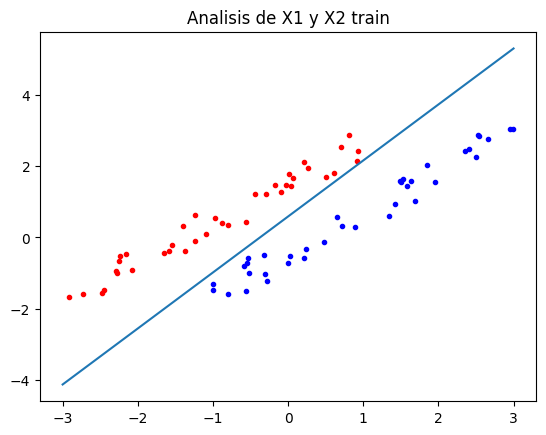

In [465]:
"""
Grafica de X1 vs X2 (Train)
"""
index_tag_class_1 = np.where(y_train == 1)
index_tag_class_2 = np.where(y_train == -1)

tag_class_1 = train_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = train_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], ".r", label="(Train) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], ".b", label="(Train) X2")


"""
Grafico de la curva de decisión
"""
plt.plot(curve_size, curve_length, label = "Curva de decisión")

plt.title("Analisis de X1 y X2 train")
plt.show()

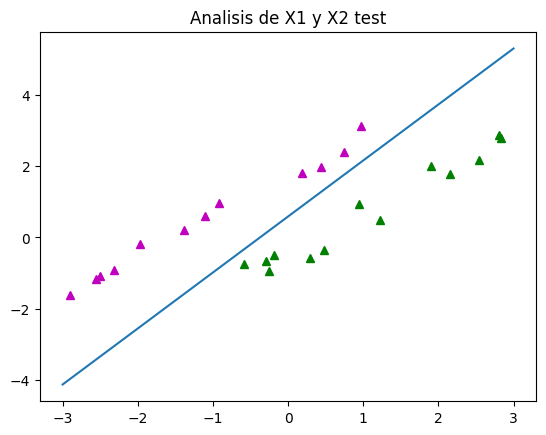

In [466]:
"""
Grafica de X1 vs X2 (Test)
"""
index_tag_class_1 = np.where(y_test == 1)
index_tag_class_2 = np.where(y_test == -1)

tag_class_1 = test_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = test_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], "^m", label="(Test) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], "^g", label="(Test) X2")


"""
Grafico de la curva de decisión
"""
plt.plot(curve_size, curve_length, label = "Curva de decisión")

plt.title("Analisis de X1 y X2 test")
plt.show()

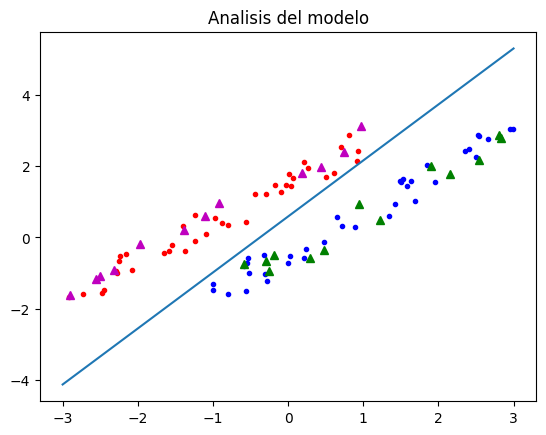

In [467]:
# Grafico de los datos en una misma imagen

"""
Grafica de X1 vs X2 (Train)
"""
index_tag_class_1 = np.where(y_train == 1)
index_tag_class_2 = np.where(y_train == -1)

tag_class_1 = train_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = train_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], ".r", label="(Train) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], ".b", label="(Train) X2")

"""
Grafica de X1 vs X2 (Test)
"""
index_tag_class_1 = np.where(y_test == 1)
index_tag_class_2 = np.where(y_test == -1)

tag_class_1 = test_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = test_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], "^m", label="(Test) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], "^g", label="(Test) X2")

"""
Grafico de la curva de decisión
"""
plt.plot(curve_size, curve_length, label = "Curva de decisión")

plt.title("Analisis del modelo")
plt.show()